<a href="https://colab.research.google.com/github/Soyeon-ErinLee/Machine_Learning/blob/master/0818_Time_Series_AR_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# data organizing
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
# 기상청 데이터
weather = pd.read_csv("/content/drive/Shared drives/2020 KU datathon/Regression/0811weather_data.csv",sep=",")
weather = weather.iloc[:,0:2] 
outtemp = weather.temperature
outhumid = weather.humidity

In [ ]:
# 
data =  pd.read_csv("/content/drive/Shared drives/2020 KU datathon/Regression/data_for_regression.csv",sep=",")

In [ ]:
data = data[['roomid','temperature','humidity']]

In [ ]:
import numpy as np
data['roomid']=data['roomid'].astype(str)
conditions = [
    (data.roomid.str.startswith('1')),
    (data.roomid.str.startswith('2')),
    (data.roomid.str.startswith('3')),
    (data.roomid.str.startswith('4')),
    (data.roomid.str.startswith('5'))]
choices = ['floor1', 'floor2', 'floor3', 'floor4','floor5']
data['floor'] = np.select(conditions, choices, default='floorB') 

In [ ]:
import numpy as np

conditions = [
    (data.roomid.str.endswith(('A','B','C','D','E','F')))
]
choices = ['extra']
data['space'] = np.select(conditions, choices, default='study') 

In [ ]:
extra = data[data.space=='extra']
study = data[data.space=='study']

In [ ]:
studytemp = study[['roomid','temperature']]
studyhumid = study[['roomid','humidity']]

In [ ]:
# 주변공간 데이터 (평균)
roomstemp = pd.read_csv("/content/drive/Shared drives/2020 KU datathon/Regression/temperaturePrediction.csv",sep=",")
roomstemp = roomstemp.drop('Unnamed: 0',axis=1)
roomshumid = pd.read_csv("/content/drive/Shared drives/2020 KU datathon/Regression/humidityPrediction.csv",sep=",")
roomshumid = roomshumid.drop('Unnamed: 0',axis=1)

# 기타학습공간 데이터 (Y)
extra = pd.read_csv("/content/drive/Shared drives/2020 KU datathon/Regression/data_for_regression.csv",sep=",")
extra = extra[['roomid','temperature','humidity']]
extra=extra[extra.roomid.str.endswith(('A','B','C','D','E','F'))]
extra=extra[extra.roomid.str.startswith(('2','3','4','5','B'))]
extratemp = extra[['roomid','temperature']]
extrahumid = extra[['roomid','humidity']]

In [ ]:
# Y dataset 
import numpy as np

ycolnames = ['y52A', 'y62B', 'y72C', 'y83A', 'y93B', 'y103C', 'y113D', 'y123E', 'y133F', 'y144A', 'y154B',
       'y164C', 'y174D', 'y185A', 'y195B', 'y205C', 'y215D', 'y1B1A', 'y2B1B', 'y3B1C', 'y4B1D']

Ytemp = pd.DataFrame(np.hstack(np.split(extratemp,21))).loc[:,1::2]
Ytemp=Ytemp.astype(float)
Ytemp.columns=ycolnames
Ytemp = Ytemp[['y1B1A', 'y2B1B', 'y3B1C', 'y4B1D','y52A', 'y62B', 'y72C', 'y83A', 'y93B', 'y103C', 'y113D', 'y123E', 'y133F', 'y144A', 'y154B',
       'y164C', 'y174D', 'y185A', 'y195B', 'y205C', 'y215D']]

Yhumid = pd.DataFrame(np.hstack(np.split(extrahumid,21))).loc[:,1::2]
Yhumid = Yhumid.astype(float)
Yhumid.columns=ycolnames
Yhumid = Yhumid[['y1B1A', 'y2B1B', 'y3B1C', 'y4B1D','y52A', 'y62B', 'y72C', 'y83A', 'y93B', 'y103C', 'y113D', 'y123E', 'y133F', 'y144A', 'y154B',
       'y164C', 'y174D', 'y185A', 'y195B', 'y205C', 'y215D']]

In [ ]:
studycolnames = "r" + studytemp.roomid.unique()

In [ ]:
studytemp = pd.DataFrame(np.hstack(np.split(studytemp,204))).loc[:,1::2]
studytemp = studytemp.astype(float)
studytemp.columns = studycolnames
studytemp

,r202,r203,r204,r205,r208,r211,r212,r213,r214,r215,r216,r217,r218,r219,r220,r221,r222,r223,r301,r302,r303,r304,r305,r306,r307,r308,r309,r310,r312,r313,r314,r315,r316,r317,r318,r319,r320,r321,r322,r323,...,r502,r503,r506,r507,r508,r509,r510,r511,r514,r515,r516,r517,rB101,rB107,rB108,rB109,rB110,rB111,rB112,rB113,rB114,rB115,rB116,rB117,rB118,rB119,rB120,rB121,rB122,rB123,rB124,rB125,rB126,rB129,rB130,rB133,rB134,rB135,rB139,rB141
0,21.622512,21.086257,20.893206,22.148042,22.169492,22.684297,22.845173,23.102576,23.070400,22.394719,22.373269,23.499404,23.059675,21.579612,23.381428,22.383994,22.512695,22.405444,21.547437,21.965715,21.375835,21.761938,22.534146,23.220552,22.823723,22.459070,22.308918,23.660281,23.145476,23.252727,22.587771,23.660281,21.483086,22.544871,22.920249,22.920249,22.834448,22.587771,23.885508,23.842607,...,22.598496,21.343660,22.437620,22.126592,21.837014,22.030066,22.030066,23.402878,16.377939,16.903469,23.810432,18.544409,28.34,21.922815,22.051516,21.504536,21.997891,27.79,28.13,23.252727,23.038225,22.598496,22.480520,21.450911,22.244568,22.662847,22.619946,22.394719,22.383994,22.566321,22.190942,21.783389,21.869189,22.748647,22.040791,22.362544,23.177651,22.995325,23.477954,23.402878
1,21.740488,21.182783,20.882480,22.040791,22.169492,22.737922,22.898799,22.995325,23.070400,22.383994,22.266018,23.510129,23.048950,21.601062,23.370703,22.437620,22.362544,22.362544,21.525986,21.965715,21.386560,21.761938,22.534146,23.209827,22.834448,22.459070,22.298193,23.649556,23.166926,23.166926,22.577046,23.671006,20.582178,22.534146,22.930974,22.845173,22.201667,23.874783,23.842607,23.456504,...,22.695022,21.032632,22.512695,22.137317,22.030066,21.697588,21.976440,23.295627,16.474465,16.710417,24.003484,18.555134,28.07,22.062241,22.030066,21.472361,22.019341,28.19,28.24,23.359978,23.048950,22.641396,22.480520,21.429460,22.233843,22.652122,22.619946,22.383994,22.383994,22.523420,22.223118,21.719038,21.879915,22.759373,22.062241,22.469795,23.177651,23.038225,23.445779,23.381428
2,21.697588,21.075532,20.979006,22.051516,22.201667,22.695022,22.888074,22.973875,23.124026,22.394719,22.448345,23.606655,23.038225,21.579612,23.317078,22.405444,22.469795,22.405444,21.515261,21.976440,21.375835,21.740488,22.555596,23.220552,22.812998,22.480520,22.373269,23.638831,23.145476,23.252727,22.577046,23.671006,21.440186,22.534146,22.920249,22.877349,22.223118,23.917683,23.842607,23.477954,...,22.748647,22.266018,22.501970,22.083691,21.922815,21.633237,22.555596,23.402878,16.806943,16.249238,23.424329,18.093955,28.13,21.976440,22.051516,21.708313,22.008616,28.37,27.86,23.252727,23.048950,22.619946,22.662847,21.440186,22.244568,22.662847,22.609221,22.416169,22.362544,22.544871,22.190942,21.804839,21.912090,22.737922,22.019341,22.362544,23.145476,22.973875,23.456504,23.392153
3,21.525986,20.818130,20.936106,22.072966,22.148042,22.684297,22.920249,23.038225,23.134751,22.512695,22.266018,23.520854,23.070400,21.579612,23.284902,22.448345,22.416169,22.394719,21.515261,21.954990,21.375835,21.740488,22.566321,23.220552,22.834448,22.459070,22.308918,23.638831,23.199102,23.199102,22.587771,23.660281,21.322209,22.587771,22.973875,22.834448,22.212393,23.885508,23.864058,23.488679,...,22.737922,21.150608,22.555596,22.105142,22.030066,21.622512,22.394719,23.284902,16.828394,16.764043,23.510129,16.924919,27.98,22.040791,22.051516,21.536711,22.019341,28.23,28.06,23.231277,23.027500,22.630671,22.501970,21.461636,22.255293,22.652122,22.619946,22.416169,22.362544,22.534146,22.180217,21.804839,21.869189,22.759373,22.008616,22.394719,23.156201,23.006050,23.445779,23.381428
4,21.525986,21.054082,20.871755,22.051516,22.169492,22.727197,22.823723,22.995325,23.124026,22.448345,22.266018,23.606655,23.134751,21.879915,23.456504,22.501970,22.426895,22.394719,21.525986,21.976440,21.386560,21.761938,22.534146,23.209827,22.823723,22.491245,22.298193,23.649556,23.242002,23.274177,22.587771,23.660281,21.107708,22.523420,22.909524,22.834448,22.394719,23.874783,23.874783

In [ ]:
studyhumid = pd.DataFrame(np.hstack(np.split(studyhumid,204))).loc[:,1::2]
studyhumid = studyhumid.astype(float)
studyhumid.columns = studycolnames
studyhumid

,r202,r203,r204,r205,r208,r211,r212,r213,r214,r215,r216,r217,r218,r219,r220,r221,r222,r223,r301,r302,r303,r304,r305,r306,r307,r308,r309,r310,r312,r313,r314,r315,r316,r317,r318,r319,r320,r321,r322,r323,...,r502,r503,r506,r507,r508,r509,r510,r511,r514,r515,r516,r517,rB101,rB107,rB108,rB109,rB110,rB111,rB112,rB113,rB114,rB115,rB116,rB117,rB118,rB119,rB120,rB121,rB122,rB123,rB124,rB125,rB126,rB129,rB130,rB133,rB134,rB135,rB139,rB141
0,75.798065,77.034027,77.697784,71.304352,71.350128,69.862396,69.175751,69.328339,68.870575,70.060760,71.769745,68.382294,70.182831,7.0,64.376862,66.940338,66.841156,71.510345,53.100616,56.762726,55.854828,55.740387,54.389984,54.283173,53.970367,53.848297,52.703888,51.902802,65.658600,65.620453,66.688568,64.239532,68.588287,63.079865,66.032440,66.093475,67.504913,68.313629,60.066254,64.231903,...,67.062408,72.044403,66.993744,73.249847,72.067291,72.723419,70.228607,65.933258,97.198517,98.182709,62.690765,95.260651,72.33,70.564301,74.401886,76.347382,75.225861,73.02,72.83,67.268402,65.734894,71.540863,71.762115,78.697235,72.540314,71.601898,39.665253,72.349579,72.959930,72.227509,68.359406,71.022064,70.236237,68.717987,73.097260,77.217133,71.098358,73.768646,69.351227,69.564850
1,75.759918,76.103241,77.514679,70.358307,70.518524,69.953949,69.770844,68.939240,68.954498,70.365936,71.357758,68.382294,70.373566,7.0,64.399750,68.275482,67.901642,70.777924,53.009064,56.846649,55.763275,54.809601,53.962738,53.718597,54.115326,53.787262,52.795441,51.063568,66.009552,65.399200,66.650421,64.277679,70.747406,63.179047,66.276581,67.550690,69.000275,60.165436,64.811737,65.223724,...,64.186127,69.900543,65.620453,74.119598,72.990448,73.082001,72.502167,66.513092,97.259552,98.320038,65.452606,94.154388,72.32,70.655853,74.470551,76.385529,75.416595,72.60,72.79,66.757233,65.582306,71.403534,71.731598,78.727753,72.525055,71.357758,39.596588,72.349579,72.891266,71.891815,68.580658,71.083099,70.198090,68.733246,73.249847,77.522308,71.037323,73.738129,69.328339,69.625885
2,75.492889,76.881439,77.629120,70.930511,72.021515,69.244415,68.794281,68.519623,69.503815,70.205719,71.907074,68.626434,69.870026,7.0,63.713104,67.863495,67.138702,71.182281,53.047211,56.312592,55.686981,54.969818,55.305511,53.726227,53.886444,54.435760,53.138763,51.048309,65.963776,65.330536,66.909821,64.277679,68.794281,63.133270,66.223175,67.512543,68.901093,60.043365,65.757782,65.071136,...,63.034088,68.100006,64.933807,74.134857,73.562653,66.482574,71.456940,68.054230,94.940216,98.403961,61.721832,97.389252,72.83,70.518524,74.417145,75.737030,75.233490,72.56,72.81,67.268402,65.589935,71.464569,71.388275,78.788788,72.509796,71.334869,39.726288,72.349579,72.975189,71.876556,68.336517,71.418793,70.426971,68.748505,73.425323,77.186615,70.823700,73.829681,69.435150,69.755585
3,74.943573,77.323944,77.690155,71.174652,70.426971,69.412262,69.953949,69.335968,69.870026,71.067841,71.586639,66.886932,69.236786,7.0,63.911469,68.405182,67.527802,71.693451,52.558929,57.304413,55.885345,55.183441,55.168182,53.108246,54.534943,53.749115,52.642853,51.063568,65.940887,65.284760,67.001373,64.353973,69.000275,62.934906,66.421539,67.466766,69.084198,60.218842,65.002472,65.078766,...,63.743622,73.158295,67.237885,73.280365,72.807343,70.457489,66.444427,67.382843,94.619781,98.472626,62.347443,94.543488,73.10,70.526154,74.440033,76.202423,75.462372,72.63,72.99,67.199738,65.589935,71.434052,71.838409,78.933746,72.456390,71.334869,39.581329,72.334320,72.914154,71.868927,68.367035,71.296722,70.220978,68.725616,73.066742,77.163727,70.709259,73.722870,69.366486,69.923431
4,74.478180,76.766998,76.873810,70.777924,71.121246,69.808990,69.480927,68.779022,69.458038,70.877106,71.830780,68.534882,70.648224,7.0,64.422638,68.656952,67.680389,70.434601,51.902802,58.082611,58.036835,55.030853,53.947479,53.360016,53.955109,54.779083,52.604706,51.025421,65.902740,65.788300,66.673309,64.270050,67.993195,62.896759,66.009552,67.344696,68.473846,60.020477,64.407379,68.756134,...,66.734344,68.46

In [ ]:
space = pd.read_csv("/content/drive/Shared drives/2020 KU datathon/주변공간.txt",sep=' ',header=None,index_col=0,
                    names=['r1','r2','r3','r4','r5','r6'])
space=space.drop('r6',axis=1)
list_of_space =space.values.tolist() # 0~20r

In [ ]:
# X dataset
Xtemp = pd.concat([studytemp,roomstemp, outtemp],axis=1)
Xhumid = pd.concat([studyhumid,roomshumid, outhumid],axis=1)

In [ ]:
Xtemp

,r202,r203,r204,r205,r208,r211,r212,r213,r214,r215,r216,r217,r218,r219,r220,r221,r222,r223,r301,r302,r303,r304,r305,r306,r307,r308,r309,r310,r312,r313,r314,r315,r316,r317,r318,r319,r320,r321,r322,r323,...,rB116,rB117,rB118,rB119,rB120,rB121,rB122,rB123,rB124,rB125,rB126,rB129,rB130,rB133,rB134,rB135,rB139,rB141,x1B1A,x2B1B,x3B1C,x4B1D,x52A,x62B,x72C,x83A,x93B,x103C,x113D,x123E,x133F,x144A,x154B,x164C,x174D,x185A,x195B,x205C,x215D,temperature
0,21.622512,21.086257,20.893206,22.148042,22.169492,22.684297,22.845173,23.102576,23.070400,22.394719,22.373269,23.499404,23.059675,21.579612,23.381428,22.383994,22.512695,22.405444,21.547437,21.965715,21.375835,21.761938,22.534146,23.220552,22.823723,22.459070,22.308918,23.660281,23.145476,23.252727,22.587771,23.660281,21.483086,22.544871,22.920249,22.920249,22.834448,22.587771,23.885508,23.842607,...,22.480520,21.450911,22.244568,22.662847,22.619946,22.394719,22.383994,22.566321,22.190942,21.783389,21.869189,22.748647,22.040791,22.362544,23.177651,22.995325,23.477954,23.402878,22.143752,22.684297,23.255408,22.239205,21.980730,22.639251,22.594206,23.196420,22.688587,22.968512,22.720762,22.995325,23.224127,22.111576,21.931395,21.989310,22.062241,22.142679,17.840127,19.599044,19.599044,26.2
1,21.740488,21.182783,20.882480,22.040791,22.169492,22.737922,22.898799,22.995325,23.070400,22.383994,22.266018,23.510129,23.048950,21.601062,23.370703,22.437620,22.362544,22.362544,21.525986,21.965715,21.386560,21.761938,22.534146,23.209827,22.834448,22.459070,22.298193,23.649556,23.166926,23.166926,22.577046,23.671006,20.582178,22.534146,22.930974,22.845173,22.201667,23.874783,23.842607,23.456504,...,22.480520,21.429460,22.233843,22.652122,22.619946,22.383994,22.383994,22.523420,22.223118,21.719038,21.879915,22.759373,22.062241,22.469795,23.177651,23.038225,23.445779,23.381428,22.152332,22.645686,23.263452,22.217755,22.047226,22.637106,22.547016,23.156201,22.830158,23.062356,22.707892,22.988890,23.220552,22.163057,22.115867,22.087982,22.025776,22.370588,18.508659,19.627644,19.627644,26.2
2,21.697588,21.075532,20.979006,22.051516,22.201667,22.695022,22.888074,22.973875,23.124026,22.394719,22.448345,23.606655,23.038225,21.579612,23.317078,22.405444,22.469795,22.405444,21.515261,21.976440,21.375835,21.740488,22.555596,23.220552,22.812998,22.480520,22.373269,23.638831,23.145476,23.252727,22.577046,23.671006,21.440186,22.534146,22.920249,22.877349,22.223118,23.917683,23.842607,23.477954,...,22.662847,21.440186,22.244568,22.662847,22.609221,22.416169,22.362544,22.544871,22.190942,21.804839,21.912090,22.737922,22.019341,22.362544,23.145476,22.973875,23.456504,23.392153,22.135172,22.667137,23.252727,22.276743,21.948555,22.622091,22.581336,23.185695,22.673572,23.054313,22.705747,22.991035,23.224127,22.120157,22.126592,22.242423,21.995745,22.437620,18.455033,19.784945,19.784945,26.2
3,21.525986,20.818130,20.936106,22.072966,22.148042,22.684297,22.920249,23.038225,23.134751,22.512695,22.266018,23.520854,23.070400,21.579612,23.284902,22.448345,22.416169,22.394719,21.515261,21.954990,21.375835,21.740488,22.566321,23.220552,22.834448,22.459070,22.308918,23.638831,23.199102,23.199102,22.587771,23.660281,21.322209,22.587771,22.973875,22.834448,22.212393,23.885508,23.864058,23.488679,...,22.501970,21.461636,22.255293,22.652122,22.619946,22.416169,22.362544,22.534146,22.180217,21.804839,21.869189,22.759373,22.008616,22.394719,23.156201,23.006050,23.445779,23.381428,22.150187,22.630671,23.247364,22.255293,21.931395,22.656412,22.639251,23.166926,22.662847,23.078444,22.752937,22.993180,23.220552,22.163057,22.135172,21.974295,21.997891,22.448345,18.026030,19.245116,19.245116,26.2
4,21.525986,21.054082,20.871755,22.051516,22.169492,22.727197,22.823723,22.995325,23.124026,22.448345,22.266018,23.606655,23.134751,21.879915,23.456504,22.501970,22.426895,22.394719,21.525986,21.976440,21.386560,21.761938,22.534146,23.209827,22.823723,22.491245,22.298193,23.649556,23.242002,23.274177,22.587771,23.660281,21.107708,22.523420,22.90952

In [ ]:
# train_test_split & standardize

# temperature
from sklearn.model_selection import train_test_split
Xtemp_train, Xtemp_test, Ytemp_train, Ytemp_test = train_test_split(Xtemp, Ytemp, test_size=0.3, random_state=1)
# Xtemp_train, Xtemp_test, Ytemp_train, Ytemp_test, outtemp_train, outtemp_test = train_test_split(Xtemp, Ytemp, outtemp, test_size=0.3, random_state=1)

from sklearn import preprocessing

Xtemp_train_std = Xtemp_train.copy()
x = Xtemp_train.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
Xtemp_train_std.loc[:,:] = x_scaled

Xtemp_test_std = Xtemp_test.copy()
x = Xtemp_test.values 
x_scaled = min_max_scaler.fit_transform(x)
Xtemp_test_std.loc[:,:] = x_scaled

train = pd.concat([Xtemp_train_std, Ytemp_train],axis=1)
test = pd.concat([Xtemp_test_std, Ytemp_test],axis=1)
# train = pd.concat([Xtemp_train_std, outtemp_train, Ytemp_train],axis=1)
# test = pd.concat([Xtemp_test_std, outtemp_test, Ytemp_test],axis=1)

# humidity
Xhumid_train, Xhumid_test, Yhumid_train, Yhumid_test, outhumid_train, outhumid_test = train_test_split(Xhumid, Yhumid, outhumid, test_size=0.3, random_state=1)

Xhumid_train_std = Xhumid_train.copy()
x = Xhumid_train.values 
x_scaled = min_max_scaler.fit_transform(x)
Xhumid_train_std.loc[:,:] = x_scaled

Xhumid_test_std = Xhumid_test.copy()
x = Xhumid_test.values 
x_scaled = min_max_scaler.fit_transform(x)
Xhumid_test_std.loc[:,:] = x_scaled

trainH = pd.concat([Xhumid_train_std, outhumid_train, Yhumid_train],axis=1)
testH = pd.concat([Xhumid_test_std, outhumid_test, Yhumid_test],axis=1)


In [ ]:
list_of_responses = Ytemp.columns.tolist()
list_of_variables = roomstemp.columns.tolist()

In [ ]:
for i in list_of_space:
    for j in i:
        print(j, end=' ')
    print('',sep='\n')

B122 B123 B124 B125 B126 
B129 B130 B133 B134 B135 
B134 B135 B139 B141 nan 
B107 B108 B109 B113 nan 
202 203 221 222 223 
208 221 211 212 213 
215 216 218 219 220 
312 313 314 315 nan 
312 313 314 315 316 
320 323 324 310 nan 
308 309 310 324 325 
307 308 327 328 329 
327 328 329 nan nan 
4113 4116 4117 4118 4004 
4025 4026 4027 4028 4030 
4043 4045 4046 4061 4060 
4062 4071 4072 4073 4074 
503 502 506 507 nan 
514 501 515 nan nan 
515 516 517 nan nan 
515 516 517 nan nan 


In [ ]:
list_of_rooms = [
'rB122 + rB123 + rB124 + rB125 + rB126', 
'rB129 + rB130 + rB133 + rB134 + rB135', 
'rB134 + rB135 + rB139 + rB141', 
'rB107 + rB108 + rB109 + rB113', 
'r202 + r203 + r221 + r222 + r223', 
'r208 + r221 + r211 + r212 + r213', 
'r215 + r216 + r218 + r219 + r220', 
'r312 + r313 + r314 + r315',
'r312 + r313 + r314 + r315 + r316', 
'r320 + r323 + r324 + r310',
'r308 + r309 + r310 + r324 + r325', 
'r307 + r308 + r327 + r328 + r329', 
'r327 + r328 + r329',
'r4113 + r4116 + r4117 + r4118 + r4004', 
'r4025 + r4026 + r4027 + r4028 + r4030', 
'r4043 + r4045 + r4046 + r4061 + r4060', 
'r4062 + r4071 + r4072 + r4073 + r4074', 
'r503 + r502 + r506 + r507',
'r514 + r501 + r515',
'r515 + r516 + r517', 
'r515 + r516 + r517']

In [ ]:
# setting formula
import math

list_of_responses = Ytemp.columns.tolist()
list_of_variables = roomstemp.columns.tolist()

for y, x1,x in zip(list_of_responses, list_of_variables,list_of_rooms):
  print(y + " ~ -1 + temperature + " + x1) # humidity

y1B1A ~ -1 + temperature + x1B1A
y2B1B ~ -1 + temperature + x2B1B
y3B1C ~ -1 + temperature + x3B1C
y4B1D ~ -1 + temperature + x4B1D
y52A ~ -1 + temperature + x52A
y62B ~ -1 + temperature + x62B
y72C ~ -1 + temperature + x72C
y83A ~ -1 + temperature + x83A
y93B ~ -1 + temperature + x93B
y103C ~ -1 + temperature + x103C
y113D ~ -1 + temperature + x113D
y123E ~ -1 + temperature + x123E
y133F ~ -1 + temperature + x133F
y144A ~ -1 + temperature + x144A
y154B ~ -1 + temperature + x154B
y164C ~ -1 + temperature + x164C
y174D ~ -1 + temperature + x174D
y185A ~ -1 + temperature + x185A
y195B ~ -1 + temperature + x195B
y205C ~ -1 + temperature + x205C
y215D ~ -1 + temperature + x215D


In [ ]:
# modeling (temperature)
import statsmodels.regression.linear_model as sm
list_of_responses = Ytemp.columns.tolist()
list_of_variables = roomstemp.columns.tolist()

# list of models
models=[]
for y, x1, x in zip(list_of_responses, list_of_variables,list_of_rooms):
  formula = y + " ~ -1 + temperature + " + x1
  models.append(sm.OLS.from_formula(formula,data=train).fit())

In [ ]:
# AR
from  statsmodels.tsa.ar_model import AR
from random import random
data = Ytemp_train['y2B1B']

model = AR(data)
model_fit = model.fit()
print('The lag value chosen is: %s' % model_fit.k_ar)
print('The coefficients of the model are:\n %s' % model_fit.params)

The lag value chosen is: 8
The coefficients of the model are:
 const       6.099646
L1.y2B1B    0.874754
L2.y2B1B   -0.368002
L3.y2B1B   -0.051798
L4.y2B1B    0.215848
L5.y2B1B    0.093519
L6.y2B1B   -0.139229
L7.y2B1B    0.092014
L8.y2B1B    0.066743
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
yhat = model_fit.predict(len(Ytemp_train['y1B1A']), len(Ytemp_train['y1B1A']) + len(Ytemp_test['y1B1A'])-1)
print(yhat)

21    28.340200
22    28.300854
23    28.258937
24    28.247174
25    28.272768
26    28.297390
27    28.302624
28    28.284235
29    28.265594
30    28.258647
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
compare_df

NameError: ignored

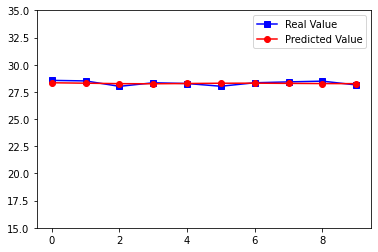

In [ ]:
compare_df = pd.DataFrame({'actual':Ytemp_test['y2B1B'].values,'predicted':yhat.values},index = Ytemp_test['y2B1B'].index).reset_index(drop = True)

import matplotlib.pyplot as plt

x = range(10)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(x, compare_df['actual'], c='b', marker="s", label='Real Value')
ax1.plot(x, compare_df['predicted'], c='r', marker="o", label='Predicted Value')
plt.legend(loc='upper right')
plt.ylim(15, 35)
plt.show()

In [ ]:
from scipy import stats
stats.ttest_ind(compare_df['actual'], compare_df['predicted'])

Ttest_indResult(statistic=0.429133105455222, pvalue=0.6729186498034017)

In [ ]:
pd.DataFrame({'actual':Ytemp_test['y2B1B'].values,'predicted':yhat.values},index = Ytemp_test['y2B1B'].index)

,actual,predicted
27,28.56,28.340200
3,28.51,28.300854
19,28.01,28.258937
23,28.34,28.247174
22,28.27,28.272768
21,28.02,28.297390
20,28.34,28.302624
18,28.42,28.284235
10,28.49,28.265594
25,28.14,28.258647


In [ ]:
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

In [ ]:
sm.OLS.from_formula('y1B1A ~ -1 + temperature + x1B1A',data=train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  y1B1A   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.434e+04
Date:                Mon, 17 Aug 2020   Prob (F-statistic):                    2.01e-36
Time:                        17:35:30   Log-Likelihood:                         -7.7560
No. Observations:                  21   AIC:                                      19.51
Df Residuals:                      19   BIC:                                      21.60
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature     1.0132      0.006    162.007      0.000       1.000       1.026
x1B1A          -0.0513      0.343     -0.149      0.883      -0.770       0.667
==============================================================================
Omnibus:                        3.339   Durbin-Watson:                   1.476
Prob(Omnibus):                  0.188   Jarque-Bera (JB):                1.307
Skew:                          -0.008   Prob(JB):                        0.520
Kurtosis:                       1.778   Cond. No.                         112.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#  model summary (temperature)  
for i in range(21):
  print(models[i].summary())

                                 OLS Regression Results                                
Dep. Variable:                  y1B1A   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.434e+04
Date:                Mon, 17 Aug 2020   Prob (F-statistic):                    2.01e-36
Time:                        17:35:32   Log-Likelihood:                         -7.7560
No. Observations:                  21   AIC:                                      19.51
Df Residuals:                      19   BIC:                                      21.60
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [ ]:
models[0].predict(Xtemp_test)

27    1303.615565
3     1305.221798
19    1303.900910
23    1304.105321
22    1303.965771
21    1304.017709
20    1304.462072
18    1304.574294
10    1304.561246
25    1304.483144
dtype: float64

In [ ]:
Ytemp_test.iloc[:,0]

27    26.61
3     25.83
19    25.98
23    27.20
22    26.24
21    26.86
20    26.42
18    25.80
10    25.87
25    26.58
Name: y1B1A, dtype: float64

In [ ]:
from scipy import stats
stats.ttest_ind(models[0].predict(Xtemp_test), Ytemp_test.iloc[:,0])

Ttest_indResult(statistic=-1.5396956687099193, pvalue=0.14102960696567302)

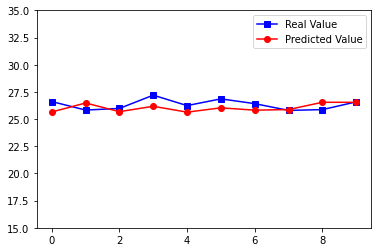

In [ ]:
import matplotlib.pyplot as plt

x = range(10)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(x, Ytemp_test.iloc[:,0], c='b', marker="s", label='Real Value')
ax1.plot(x, models[0].predict(Xtemp_test), c='r', marker="o", label='Predicted Value')
plt.legend(loc='upper right')
plt.ylim(15, 35)
plt.show()

In [ ]:
models[0].params

Intercept                        26.823657
temperature                       0.512297
rB122                             0.118521
rB123                            -0.247961
rB124                            -0.696906
rB125                            -0.150177
rB126                            -0.567513
x1B1A                            -0.104091
pow(temperature * x1B1A, 0.5)    -0.091698
dtype: float64

In [ ]:
# modeling (humidity)
import statsmodels.regression.linear_model as sm
list_of_responses = Ytemp.columns.tolist()
list_of_variables = roomstemp.columns.tolist()

# list of models
modelsH=[]
for y, x1,x in zip(list_of_responses, list_of_variables,list_of_rooms):
  formula =  y + " ~ humidity + " + x + " + " + x1 +  " +pow(humidity*" + x1+",0.5)"
  modelsH.append(sm.OLS.from_formula(formula,data=trainH).fit())

In [ ]:
# model summary (humidity)  
for i in range(21):
  print(modelsH[i].summary())

                            OLS Regression Results                            
Dep. Variable:                  y1B1A   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                 -0.264
Method:                 Least Squares   F-statistic:                    0.4778
Date:                Mon, 17 Aug 2020   Prob (F-statistic):              0.850
Time:                        15:55:40   Log-Likelihood:                0.63304
No. Observations:                  21   AIC:                             16.73
Df Residuals:                      12   BIC:                             26.13
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [ ]:
from scipy import stats
stats.ttest_ind(modelsH[0].predict(Xhumid_test), Yhumid_test.iloc[:,0])

Ttest_indResult(statistic=1.3851521739348664, pvalue=0.1829336756363787)

In [ ]:
print(modelsH[0].predict(Xhumid_test), Yhumid_test.iloc[:,0])

27    73.766988
3     73.604674
19    72.809434
23    73.362887
22    73.008746
21    72.832322
20    72.982602
18    73.729676
10    72.895011
25    73.017503
dtype: float64 27    72.82
3     72.99
19    73.52
23    72.57
22    72.90
21    73.26
20    73.57
18    72.80
10    72.57
25    72.71
Name: y1B1A, dtype: float64


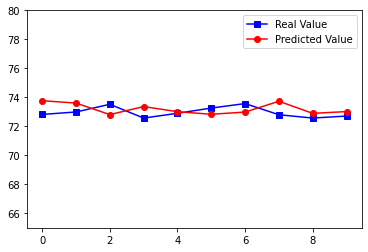

In [ ]:
import matplotlib.pyplot as plt

x = range(10)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(x, Yhumid_test.iloc[:,0], c='b', marker="s", label='Real Value')
ax1.plot(x, modelsH[0].predict(Xhumid_test), c='r', marker="o", label='Predicted Value')
plt.legend(loc='upper right')
plt.ylim(65, 80)
plt.show()